In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

import warnings
warnings.filterwarnings('ignore')

#import yfinance as yf
#import finplot.candlestick_ochl 
import finplot as fplt
import matplotlib.dates as mdates

# Default number of currencies we will look at at each step
x = 10

In [31]:
df = pd.read_csv('crypto-markets.csv')
#df.info()
df.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,33.32


In [32]:
# Transform date to date object
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [34]:
rank_1_data = df[df['ranknow'] == 1]
rank_2_data = df[df['ranknow'] == 2]

name_rank_1 = rank_1_data['name'].iloc[0]
name_rank_2 = rank_2_data['name'].iloc[1]
highest_open_price_rank_1 = rank_1_data['open'].max()
highest_open_price_rank_2 = rank_2_data['open'].max()
close_price_rank_1 = rank_1_data['close'].iloc[0]
close_price_rank_2 = rank_2_data['close'].iloc[1]

print(f"The cryptocurrency with rank 1 is {name_rank_1}")
print(f"Highest open price: {highest_open_price_rank_1}")
print(f"Close price: {close_price_rank_1}\n")

print(f"The cryptocurrency with rank 2 is {name_rank_2}")
print(f"Highest open price: {highest_open_price_rank_2}")
print(f"Close price: {close_price_rank_2}")

The cryptocurrency with rank 1 is Bitcoin
Highest open price: 19475.8
Close price: 134.21

The cryptocurrency with rank 2 is XRP
Highest open price: 3.36
Close price: 0.005613


In [36]:
print("Number of cryptocurrencies listed")
latest_df['symbol'].nunique()

Number of cryptocurrencies listed


1461

In [35]:
df.groupby('name').max()['close']

name
0chain           0.619802
0x               2.370000
0xBitcoin        4.330000
0xcert           0.039857
1World           0.443498
                   ...   
smARTOFGIVING    0.127035
ugChain          0.178324
vSlice           1.170000
vSportCoin       0.004275
wys Token        0.060287
Name: close, Length: 2071, dtype: float64

In [8]:
# What start date do we have for each cryptocurrency?
start_df = pd.DataFrame({'start_date' : df.groupby( [ "name", "ranknow"] )['date'].min()}).reset_index()

# List the oldest ones
print("Oldest Cryptocurrencies")
start_df.sort_values(['start_date']).head(x)

Oldest Cryptocurrencies


,name,ranknow,start_date
155,Bitcoin,1,2013-04-28
789,Litecoin,6,2013-04-28
916,Novacoin,483,2013-04-28
983,Peercoin,148,2013-04-28
1287,Terracoin,582,2013-04-28
890,Namecoin,241,2013-04-28
844,Mincoin,1006,2013-05-03
555,Freicoin,1016,2013-05-03
528,Feathercoin,269,2013-05-03
720,Ixcoin,923,2013-05-08


In [37]:
max_close_price = df.groupby('name')['close'].max().sort_values(ascending=False).head(5)
max_close_price

name
Project-X             2300740.0
Bit20                 1569870.0
42-coin                793273.0
Russian Miner Coin      48759.4
bitBTC                  21139.3
Name: close, dtype: float64

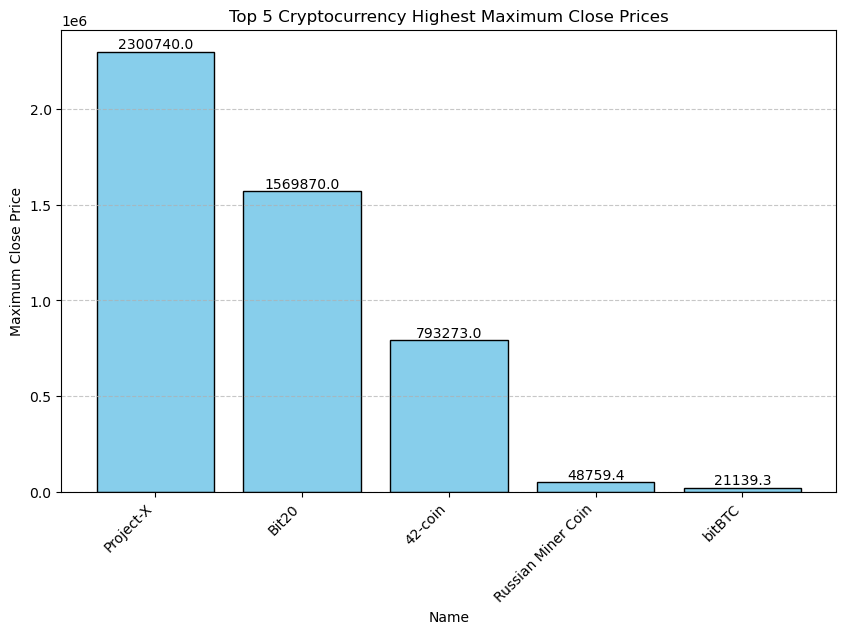

In [52]:
plt.figure(figsize=(10, 6))
#max_close_price.plot(kind='bar', color='skyblue', edgecolor='black')
bars = plt.bar(max_close_price.index, max_close_price, color='skyblue', edgecolor='black')
plt.title('Top 5 Cryptocurrency Highest Maximum Close Prices')
plt.xlabel('Name')
plt.ylabel('Maximum Close Price')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10, color='black')

plt.show()

In [39]:
latest_df[latest_df['ranknow'] <= x].groupby('ranknow').name.unique()

ranknow
1          [Bitcoin]
2         [Ethereum]
3           [Ripple]
4     [Bitcoin Cash]
5          [Cardano]
6         [Litecoin]
7              [NEO]
8          [Stellar]
9              [EOS]
10             [NEM]
Name: name, dtype: object

In [40]:
latest_df.sort_values(by=['market'], ascending=[False])
latest_df[['name','market']].head(x)

,name,market
1744,Bitcoin,139325000000
2658,Ethereum,81337400000
4305,Ripple,32219400000
4503,Bitcoin Cash,19659800000
4631,Cardano,9983060000
6376,Litecoin,8190580000
6891,NEO,6992380000
8172,Stellar,7064590000
8392,EOS,5618380000
9434,NEM,4940820000


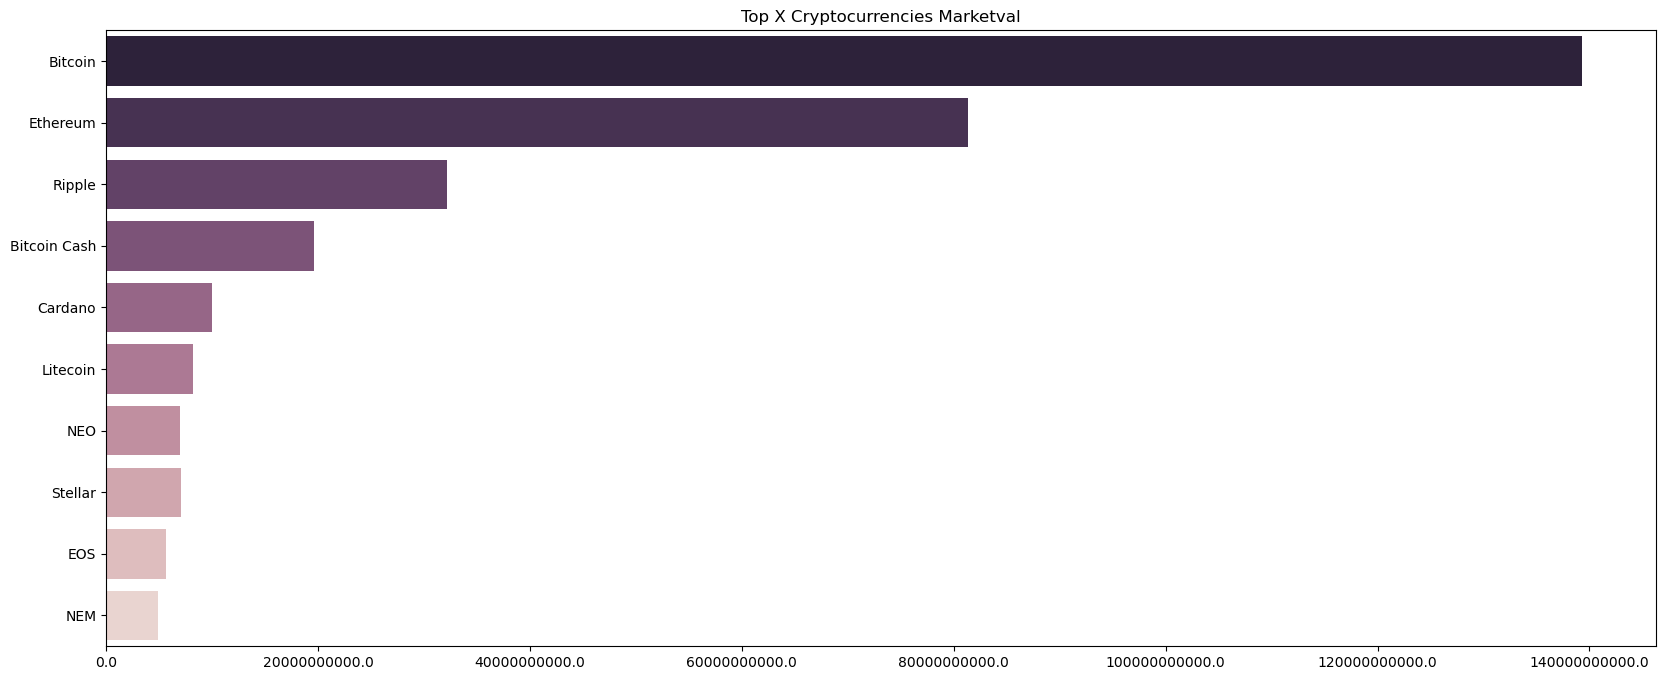

In [41]:
# Plot the top X currencies latest marketval
name = latest_df['name'].unique()
currency  = []
marketval = []
x_currencies = name[:x]
for i, cn in enumerate(x_currencies):
     filtered = latest_df[(latest_df['name']==str(cn))]
     currency.append(str(cn))
     marketval.append(filtered['market'].values[0])

f, ax = plt.subplots(figsize=(20, 8)) 
g = sns.barplot( y = currency, x = marketval, palette=sns.cubehelix_palette(x, reverse=True))
plt.title("Top X Cryptocurrencies Marketval")
ax.set_xticklabels(ax.get_xticks())
fig=plt.gcf()
plt.show()

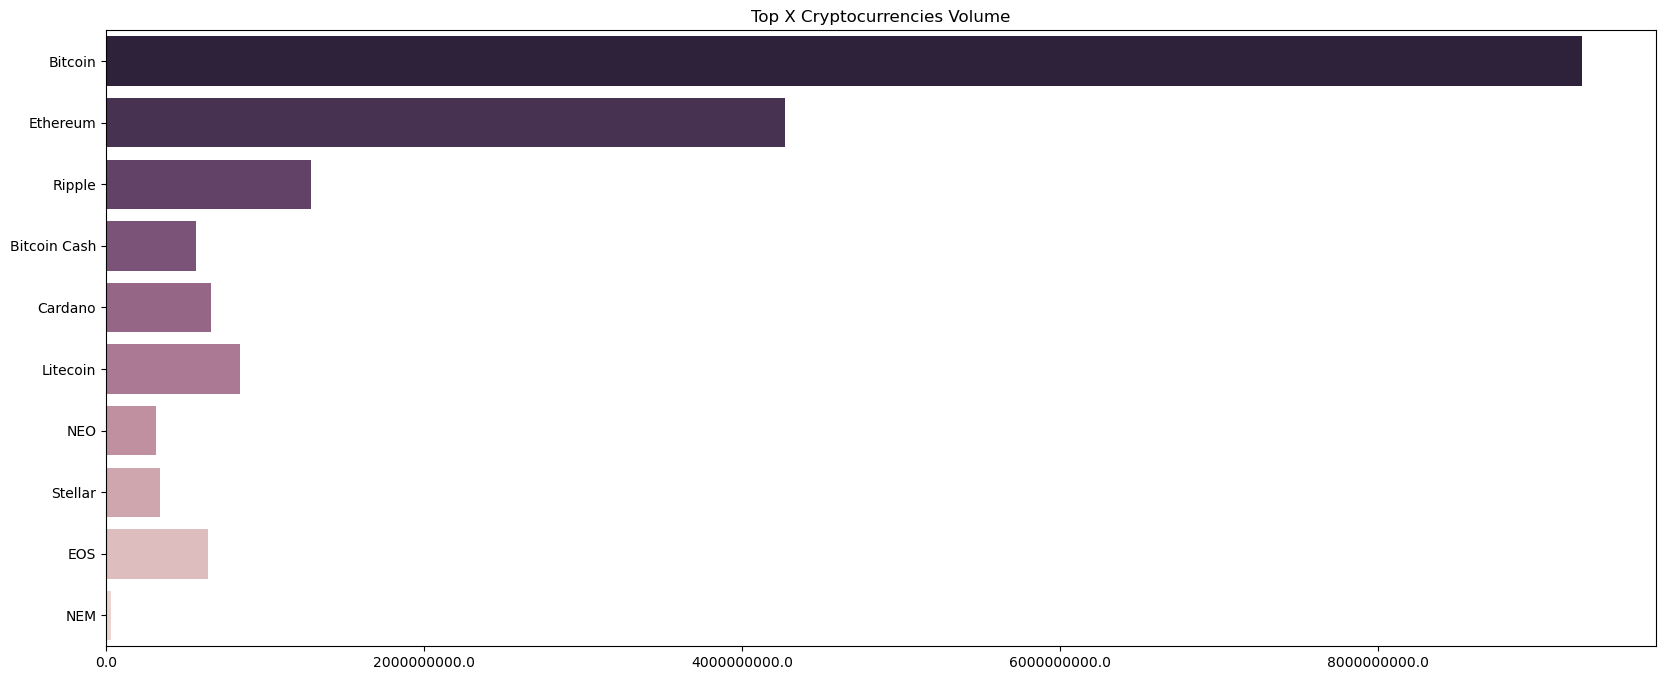

In [42]:
# Plot the top X currencies latest volume 
latest_df
currency  = []
volume = []
x_currencies = name[:x]
for i, cn in enumerate(x_currencies):
     filtered = latest_df[(latest_df['name']==str(cn))]
     currency.append(str(cn))
     volume.append(filtered['volume'].values[0])
        
f, ax = plt.subplots(figsize=(20, 8)) 
g = sns.barplot( y = currency, x = volume, palette=sns.cubehelix_palette(x, reverse=True))
plt.title("Top X Cryptocurrencies Volume")
ax.set_xticklabels(ax.get_xticks())
fig=plt.gcf()
plt.show()

In [45]:
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by='date')
df['daily_return'] = df['close'].pct_change() * 100

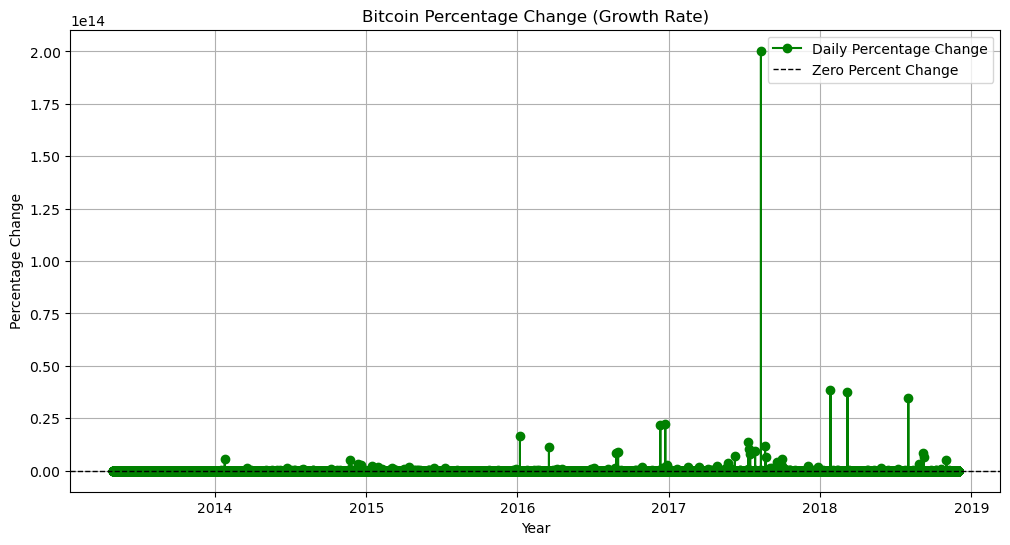

In [46]:
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['daily_return'], label='Daily Percentage Change', linestyle='-', marker='o', color='green')
plt.axhline(0, color='black', linestyle='--', linewidth=1, label='Zero Percent Change')  # Add a line at 0 for reference
plt.title('Bitcoin Percentage Change (Growth Rate)')
plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.legend()
plt.grid(True)
plt.show()

In [47]:
rank = 2
months = 6

name = df[df.ranknow == rank].iloc[-1]['name']
filtered_df = df[(df['ranknow'] == rank) & (df['date'] > (max(df['date']) - timedelta(days=30*months)))]
OHLCfiltered_df = filtered_df[['date','open','high','low','close']]
OHLCfiltered_df['date'] = mdates.date2num(OHLCfiltered_df['date'].dt.date)

OHLCfiltered_df.head()

,date,open,high,low,close
3807,17686.0,0.692466,0.703623,0.644603,0.661425
3808,17687.0,0.661898,0.683840,0.641428,0.677015
3809,17688.0,0.677901,0.681668,0.660059,0.674797
3810,17689.0,0.675313,0.688223,0.673146,0.678128
3811,17690.0,0.677586,0.679668,0.660804,0.674343


In [ ]:
4. Comparison of Prices : Russian Miner Coin (RMC) vs. bitBTC in year 2018

In [48]:
df['date'] = pd.to_datetime(df['date'])
start_date = '2018-01-01'
end_date = '2018-12-31'
rmc_data = df[(df['symbol'] == 'RMC') & (df['date'] >= start_date) & (df['date'] <= end_date)]
bitbtc_data = df[(df['symbol'] == 'BITBTC') & (df['date'] >= start_date) & (df['date'] <= end_date)]

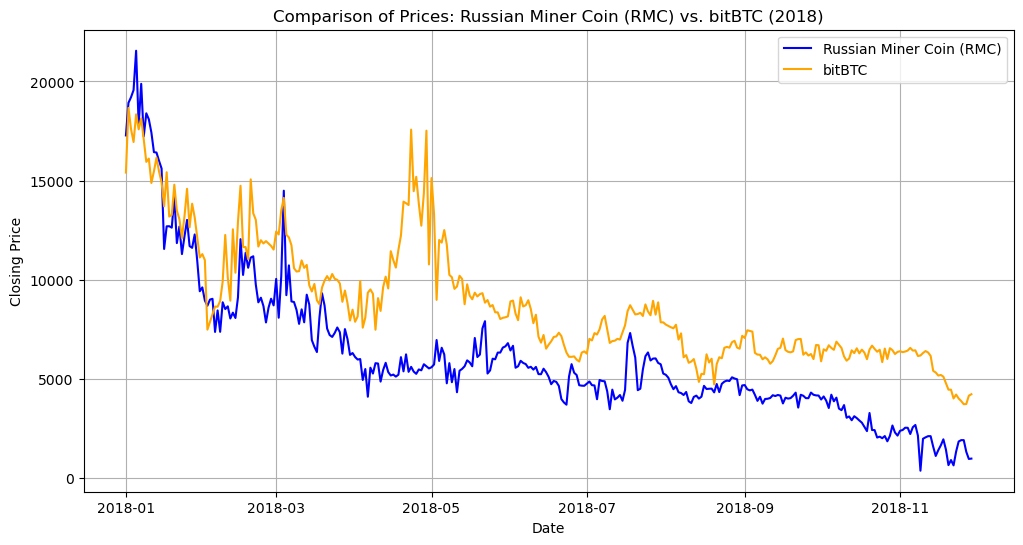

In [49]:
plt.figure(figsize=(12, 6))
plt.plot(rmc_data['date'], rmc_data['close'], label='Russian Miner Coin (RMC)', linestyle='-', color='blue')
plt.plot(bitbtc_data['date'], bitbtc_data['close'], label='bitBTC', linestyle='-', color='orange')
plt.title('Comparison of Prices: Russian Miner Coin (RMC) vs. bitBTC (2018)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()